# Loading data

In [1]:
import pandas as pd

from pathlib import Path

In [2]:
data_path = Path("./data")

In [3]:
list(data_path.glob("*"))

[PosixPath('data/population_total.csv'),
 PosixPath('data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv'),
 PosixPath('data/.ipynb_checkpoints'),
 PosixPath('data/life_expectancy_years.csv')]

In [4]:
population = pd.read_csv(data_path / "population_total.csv", index_col="country")
life_expectancy = pd.read_csv(data_path / "life_expectancy_years.csv", index_col="country")
income = pd.read_csv(data_path / "income_per_person_gdppercapita_ppp_inflation_adjusted.csv", index_col="country")

# population.head()
# life_expectancy.head()

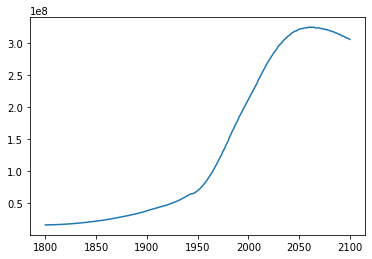

In [5]:
population.T["Indonesia"].plot()

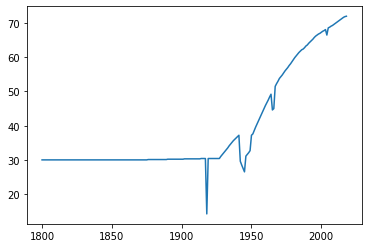

In [6]:
life_expectancy.T["Indonesia"].plot()

In [7]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, Afghanistan to Zimbabwe
Columns: 219 entries, 1800 to 2018
dtypes: float64(219)
memory usage: 326.4+ KB


In [8]:
life_expectancy.index ^ population.index

Index(['Holy See', 'Liechtenstein', 'Monaco', 'Nauru', 'Palau', 'San Marino',
       'St. Kitts and Nevis', 'Tuvalu'],
      dtype='object', name='country')

In [9]:
set(population.index) - set(life_expectancy.index)

{'Holy See',
 'Liechtenstein',
 'Monaco',
 'Nauru',
 'Palau',
 'San Marino',
 'St. Kitts and Nevis',
 'Tuvalu'}

In [10]:
set(income.index) - set(life_expectancy.index)

{'Monaco', 'Nauru', 'Palau', 'San Marino', 'St. Kitts and Nevis', 'Tuvalu'}

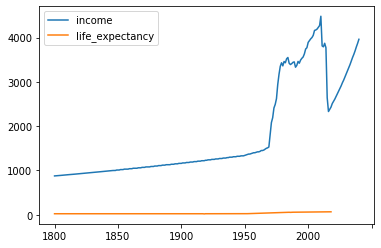

In [11]:
yemen = pd.concat([
    income.T["Yemen"].rename("income"),
    life_expectancy.T["Yemen"].rename("life_expectancy"),
], axis=1)

yemen.plot()


/home/rickylim/anaconda3/envs/ror/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 22 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


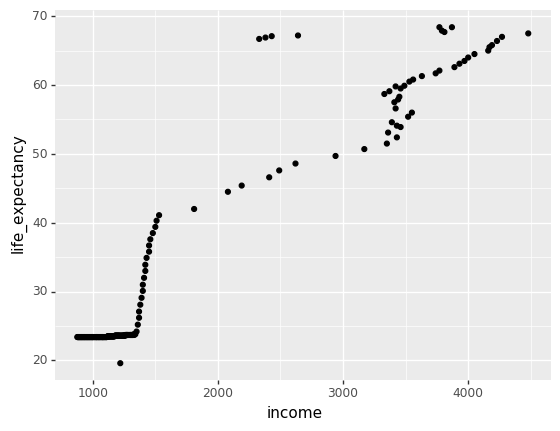

<ggplot: (8780496984801)>

In [12]:
from plotnine import ggplot, geom_point, aes

ggplot(yemen, aes("income", "life_expectancy")) + geom_point()

In [13]:
m = pd.concat([
    population["1990"].rename("population"), 
    life_expectancy["1990"].rename("life_expectancy"),
    income["1990"].rename("income")
], axis=1, join="inner")

In [14]:
m

,population,life_expectancy,income
country,,,
Afghanistan,12200000,51.6,1040
Albania,3280000,73.9,4560
Algeria,25900000,71.0,10200
Andorra,54500,79.5,28400
Angola,12200000,50.2,4390
...,...,...,...
Venezuela,19900000,72.7,14500
Vietnam,68200000,68.2,1500
Yemen,12100000,58.7,3330


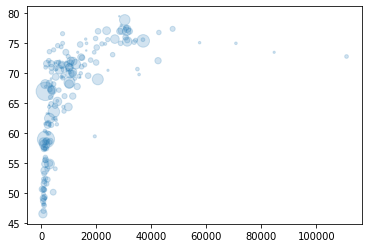

In [15]:
from matplotlib import pyplot as plt

import numpy as np


fig, ax  = plt.subplots()
ax.scatter(m["income"], m["life_expectancy"], s=np.sqrt(m["population"]) / 100, alpha=0.2)

fig.savefig("bubble.png")

In [16]:
def gapminder_bubble(year):
    year_str = str(year)
    m = pd.concat([
    population[year_str].rename("population"), 
    life_expectancy[year_str].rename("life_expectancy"),
    income[year_str].rename("income")
    ], axis=1, join="inner")
    
    fig, ax  = plt.subplots()
    ax.scatter(m["income"], m["life_expectancy"], s=np.sqrt(m["population"]) / 100, alpha=0.2)
    ax.set_xlabel("income")
    ax.set_ylabel("life_expectancy")
    ax.set_xscale("log")
    ax.set_xlim(100, 1e5)
    ax.set_ylim(10, 100)
    fig.suptitle(f"year: {year_str}")
    return fig, ax

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc5e66730d0>)

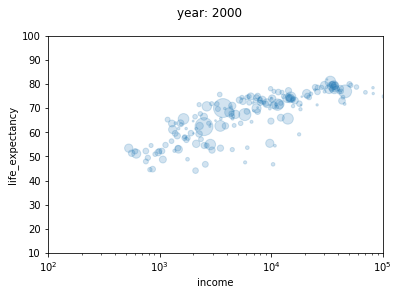

In [17]:
gapminder_bubble(2000)

# Here is your figure
![Here is your figure](bubble.png)

In [18]:
from ipywidgets import interact

interact(gapminder_bubble, year=(1800, 2018))

interactive(children=(IntSlider(value=1909, description='year', max=2018, min=1800), Output()), _dom_classes=(…

<function __main__.gapminder_bubble(year)>